In [2]:
import pandas as pd

cfdata = pd.read_csv('./data/cfdata.csv')
cfdata = cfdata.drop(['Unnamed: 0'],axis=1)
cfdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26545 entries, 0 to 26544
Data columns (total 58 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   APVPERMYMD   26545 non-null  object 
 1   TRDSTATEGBN  26545 non-null  int64  
 2   TRDSTATENM   26545 non-null  object 
 3   DCBYMD       10145 non-null  object 
 4   SITEAREA     25600 non-null  object 
 5   BPLCNM       26545 non-null  object 
 6   X            26545 non-null  float64
 7   Y            26545 non-null  float64
 8   region       26545 non-null  object 
 9   ADDR         26545 non-null  object 
 10  JIGA         26545 non-null  int64  
 11  op_op        26545 non-null  int64  
 12  op_op_12     26545 non-null  int64  
 13  op_op_6      26545 non-null  int64  
 14  op_op_3      26545 non-null  int64  
 15  op_cl        26545 non-null  int64  
 16  op_cl_12     26545 non-null  int64  
 17  op_cl_6      26545 non-null  int64  
 18  op_cl_3      26545 non-null  int64  
 19  cl_o

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
cfdata.SITEAREA = cfdata.SITEAREA.astype('str')

In [4]:
import locale

In [5]:
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

'en_US.UTF-8'

In [6]:
for i in range(len(cfdata)):
    cfdata.SITEAREA[i] = locale.atof(cfdata.SITEAREA[i])

<ipython-input-6-bc2994309961>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cfdata.SITEAREA[i] = locale.atof(cfdata.SITEAREA[i])


In [7]:
cfdata.head()

,APVPERMYMD,TRDSTATEGBN,TRDSTATENM,DCBYMD,SITEAREA,BPLCNM,X,Y,region,ADDR,...,95~99세,100세 이상,num_sw8,sw8_name,sw8_dist,at4,po3,num_unv,unv_name,unv_dist
0,2013-01-09,3,폐업,2017-08-31,48.84,일육커피,127.133821,37.545801,강동구,서울특별시 강동구 구천면로 292-1,...,23,10.0,2,암사역 8호선,736,6,11,0,없음,x
1,2014-08-11,3,폐업,2017-05-08,3.3,블럭킹,127.140386,37.555312,강동구,서울특별시 강동구 고덕로 133,...,11,7.0,1,명일역 5호선,541,3,7,0,없음,x
2,2014-04-03,3,폐업,2017-11-03,27,지희(ZIHEE),127.131589,37.527617,강동구,서울특별시 강동구 양재대로89길 74,...,14,10.0,2,둔촌동역 5호선,408,6,11,1,한국체육대학교,829
3,2014-04-03,3,폐업,2017-09-08,71.4,그리고카페(grigo cafe),127.133850,37.537172,강동구,서울특별시 강동구 진황도로 66,...,19,12.0,4,강동역 5호선,192,8,12,0,없음,x
4,2015-04-21,3,폐업,2017-10-19,42.9,구앤타오주스 강동성심점,127.135853,37.535925,강동구,서울특별시 강동구 천호대로173길 18,...,29,21.0,3,강동역 5호선,305,7,11,0,없음,x


## 데이터셋을 훈련데이터셋과 테스트 데이터셋으로 나누기

In [67]:
cf1 = cfdata.iloc[:, [1,4]]
cf2 = cfdata.iloc[:, 10:27]
cf3 = cfdata.iloc[:,[50,53,54,55]]
cf = pd.concat([cf1,cf2,cf3],axis=1)
cf = cf.reset_index(drop=True)
cf.columns

Index(['TRDSTATEGBN', 'SITEAREA', 'JIGA', 'op_op', 'op_op_12', 'op_op_6',
       'op_op_3', 'op_cl', 'op_cl_12', 'op_cl_6', 'op_cl_3', 'cl_op',
       'cl_op_12', 'cl_op_6', 'cl_op_3', 'cl_cl', 'cl_cl_12', 'cl_cl_6',
       'cl_cl_3', 'num_sw8', 'at4', 'po3', 'num_unv'],
      dtype='object')

In [68]:
cf = cf.dropna()

In [69]:
from sklearn.model_selection import train_test_split

X, y = cf.iloc[:, 1:].values, cf.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

## 다중선형회귀모델 생성하기

In [62]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [54]:
y_predict = mlr.predict(X_test)

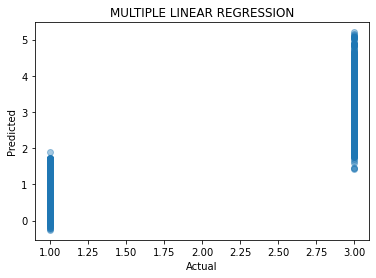

In [55]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

<AxesSubplot:>

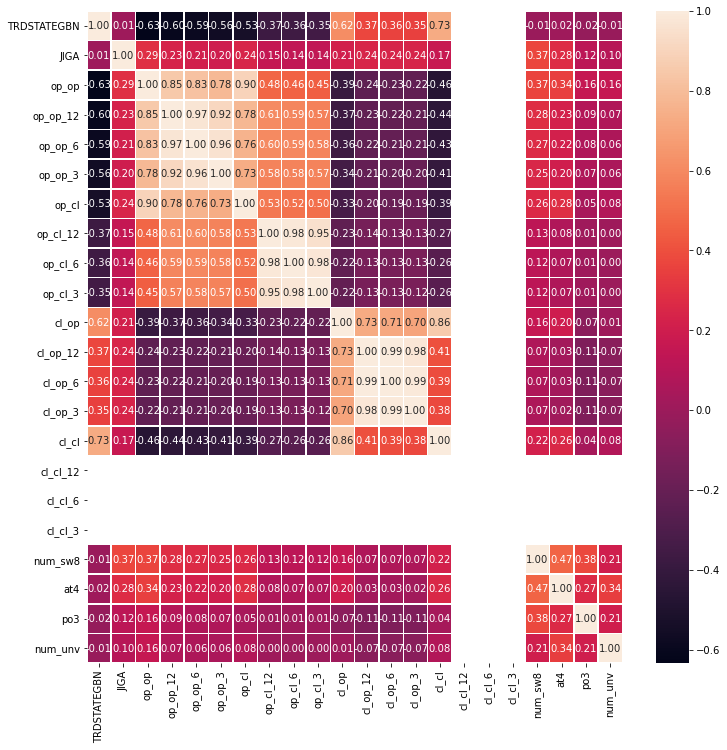

In [56]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(data=cf.corr(), annot=True, fmt='.2f', linewidths=.5)

## 예측정확도 확인

In [70]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [71]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

훈련 MSE: 0.312, 테스트 MSE: 0.314
훈련 R^2: 0.670, 테스트 R^2: 0.669


In [73]:
slr.summary()

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [63]:
mlr.score(X_train, y_train)

0.6702615219705153

In [65]:
r_square = mlr.score(X_test, y_test)
print('R-square: ', r_square)
print('\n')
print('X 변수의 기울기: ', mlr.coef_)
print('\n')
print('절편: ', mlr.intercept_)

R-square:  0.6685450783209393


X 변수의 기울기:  [-1.45562051e-06  1.46342230e-10 -2.63444768e-03 -3.83800523e-03
  1.13882174e-03 -4.23362311e-03  1.19134799e-03 -1.11478863e-03
 -1.56552229e-03  2.48667221e-03 -3.01164546e-03  6.41302042e-03
 -3.18993693e-03  6.87798444e-03  5.79262998e-03 -1.30104261e-18
  0.00000000e+00 -4.33680869e-19  5.32130482e-04  2.39443734e-03
  2.94467628e-03 -9.06407862e-03]


절편:  1.7125721934273033


In [66]:
cf.columns

Index(['TRDSTATEGBN', 'SITEAREA', 'JIGA', 'op_op', 'op_op_12', 'op_op_6',
       'op_op_3', 'op_cl', 'op_cl_12', 'op_cl_6', 'op_cl_3', 'cl_op',
       'cl_op_12', 'cl_op_6', 'cl_op_3', 'cl_cl', 'cl_cl_12', 'cl_cl_6',
       'cl_cl_3', 'num_sw8', 'at4', 'po3', 'num_unv'],
      dtype='object')

In [41]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

 1) cl_cl                          0.192107
 2) op_op                          0.178077
 3) cl_op                          0.173269
 4) op_cl                          0.114451
 5) op_op_12                       0.083744
 6) cl_op_12                       0.078922
 7) op_op_6                        0.073295
 8) op_op_3                        0.039633
 9) cl_op_6                        0.030640
10) cl_op_3                        0.018310
11) op_cl_12                       0.008077
12) op_cl_3                        0.004927
13) op_cl_6                        0.004335
14) JIGA                           0.000060
15) SITEAREA                       0.000060
16) po3                            0.000058
17) at4                            0.000018
18) num_sw8                        0.000011
19) num_unv                        0.000006
20) cl_cl_12                       0.000000
21) cl_cl_6                        0.000000
22) cl_cl_3                        0.000000


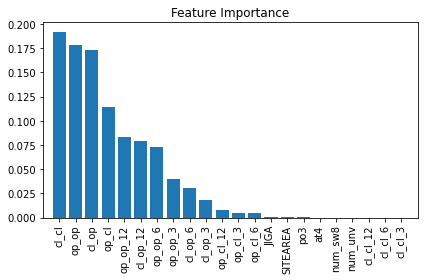

In [42]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = cf.columns[1:]

forest = RandomForestClassifier(n_estimators=500, random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')

plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()

plt.show()

In [43]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('이 임계 조건을 만족하는 샘플의 수:', X_selected.shape[1])

이 임계 조건을 만족하는 샘플의 수: 4


In [44]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) cl_cl                          0.192107
 2) op_op                          0.178077
 3) cl_op                          0.173269
 4) op_cl                          0.114451


In [45]:
from sklearn.feature_selection import RFE

rfe = RFE(forest, n_features_to_select=5)
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(n_estimators=500, random_state=1),
    n_features_to_select=5)

In [46]:
rfe.ranking_

array([11, 10,  1,  1,  2,  4,  1,  8, 12,  9,  1,  3,  6,  7,  1, 16, 17,
       18, 14, 13,  5, 15])

In [47]:
f_mask = rfe.support_

In [48]:
importances = rfe.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

In [49]:
for i in indices:
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[f_mask][i], 
                            importances[i]))

 4) cl_cl                          0.356181
 4) cl_op                          0.272073
 4) op_op                          0.258041
 4) op_cl                          0.113696
 4) op_op_12                       0.000009
